In [67]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [68]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [70]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [71]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [72]:
# View all of the classes that automap found
print(Base.classes.keys())


['measurement', 'station']


In [73]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [75]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [76]:
one_year_ago[0].date()

datetime.date(2016, 8, 23)

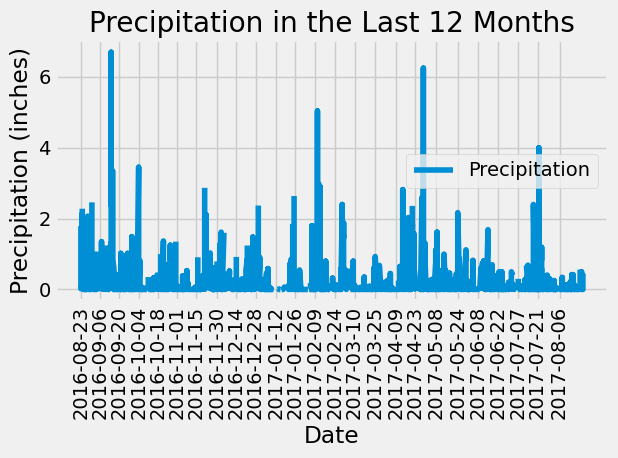

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago[0].date()).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
precipitation_df.sort_values(by='Date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')

x_ticks = precipitation_df['Date'][::90]
plt.xticks(x_ticks, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.id).count()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f"Station: {station}, Observation Count: {count}")

Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).all()
print(f"Temperature Statistics for Station {most_active_station}:")
print(f"Lowest Temperature: {temperature_stats[0][0]} °F")
print(f"Highest Temperature: {temperature_stats[0][1]} °F")
print(f"Average Temperature: {temperature_stats[0][2]} °F")

Temperature Statistics for Station USC00519281:
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66378066378067 °F


In [82]:
one_year_ago[0].date()

datetime.date(2016, 8, 23)

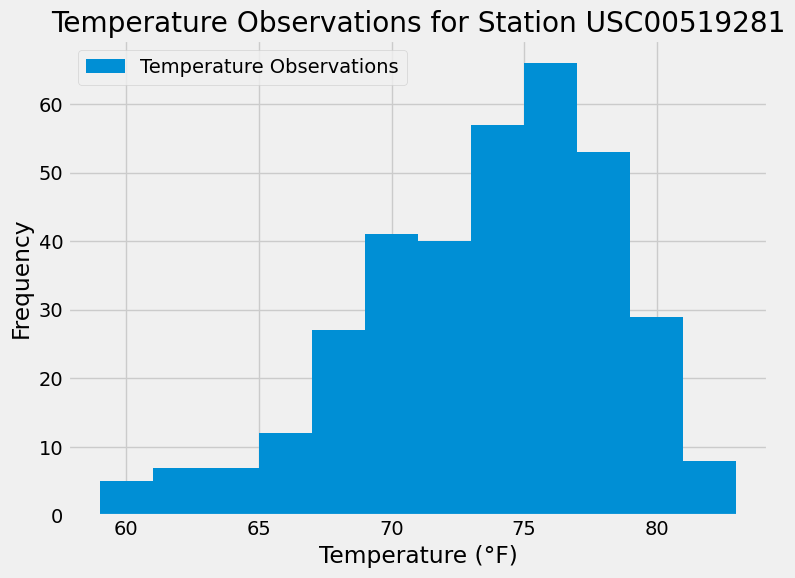

In [83]:
# Using the most active station id
# Query the last 12 months of temperature observation data for the most active station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_station).\
            filter(Measurement.date >= one_year_ago[0].date()).all()

tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

plt.figure(figsize=(8, 6))
plt.hist(tobs_df['Temperature'], bins=12, label='Temperature Observations')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session

In [84]:
# Close Session
session.close()